<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>

<center><h1>Naive Bayesian Classifiers</h1></center>

In this notebook, we'll be focusing on **_Naive Bayesian Classifiers_**, or "Naive Bayes" for short.  This is an algorithm that uses **_Bayes' Theorem_** to make a classification based on probability.  In case you're unfamiliar with Bayes' Theorem, let's look at the formula:
<br>
<br>
<center><img src='img/bayes_theorem.png' height=40% width=40%></center>
<br>
<br>
Don't worry if you've seen this mathematical notation before. In plain English, that formula reads:

"The probability of A given B equals the probability of B given A, times the probability of A, divided by the probability of B".  

Let's run through an example case here and see if we can demystify this equation a little bit more. 

<center><h3>Scenario: Spam Detection</h3></center>

We have a dataset of emails, and we're trying to build a classifier that can predict if an email is spam or not by examining the words based in the emails.  Each email in our training set has been labeled as "spam" or "ham" (a real email, not spam).  We've counted each word used in every email, and found the following:

**_65% of the emails in the dataset are "Spam"._**

**_"Spam"_** emails contain the word _"deal"_ 80% of the time, and _"win"_ 40% of the time.  

**_35% of the emails in the datasert are "Ham"._**

**_"Ham"_** emails contain the word _"deal"_ 17% of the time, and _"win"_ 6% of the time.  

The next email we try to predict contains the both words "deal" and "win". Given the information above, we can plug these numbers into Bayes' Theorem and predict the likelihood that this is email Spam. 

<center>P(Spam|deal, win) = (P(win, deal|Spam) * P(Spam)) / P(deal, win)</center>

This can be further broken down into: 
<br>
<br>
<center>P(Spam|deal) \* P(Spam|win) = P(deal|Spam) \* P(Spam) \*  P(win|Spam) \* P(Spam) / P(deal|Spam) + P(deal|!Spam) \* P(win|Spam) + P(win|!Spam)</center>

In the equation above, "P(deal|!Spam)" can be read as "the percentage that 'deal' occurs in 'Ham' emails".  

On the next step, we'll start defining the probabilities for everything in that equation so we can plug them in:

1. P(deal|Spam) = .8
1. P(win|Spam) = .4
1. P(Spam) = .65
1. P(deal|!Spam) = .17
1. P(win|!Spam) = .06
1. P(!Spam) = .35

Let's replace some of these terms with the probabilities listed above and see how it works out:
<br>
<br>
<center>(.8 \* .65 \* .4 \* .65) / .8 \* .65 + .35 \* .17 \* .4 \* .65 + .35 \* .6 = **0.922595** </center>
<br>
<br>
Based on the math from Bayes' Theorem, we can predict probability that a new email containing both "deal" and "win" is "Spam" is approximately **92.2%**!

<center><h3>Using Naive Bayes in the Real World</h3></center>

In the above example, we did the math by hand.  That isn't very practical in the real world.  Luckily, `sklearn` contains some awesome implementations of Naive Bayesian Classifiers (and regressors!).  

For this assignment, we're going to use a `GaussianNB()` object.  There are a few different kinds of Naive Bayesian Classifiers, but for this one we'll stick to one that assumes our data follows a Gaussian (normal) distribution.  

Let's Get Started!

In [360]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.random.seed(0)
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
% matplotlib inline

# Uses load_iris() to load data into iris variable, then assigns iris.data and iris.target to appropriate variables
iris = load_iris()
dataset = iris.data
class_label_vector = iris.target

# Uses train_test_split to split the data into X_train, X_test, y_train, and y_test variables
### X_train, X_test, Y_train, Y_test = train_test_split(dataset, class_label_vector, shuffle=True)

# Create a GaussianNB() object and fit it using the training data
clf_naïve_bayes = GaussianNB()
clf_naïve_bayes.fit(dataset, class_label_vector)
print(clf_naïve_bayes)

# Uses fitted model to create predictions for X_test data
test_prediction_vector = clf_naïve_bayes.predict(dataset)

# Gathers and displays classifier resultant information
print("\nTEST PREDICTION VECTOR: \n{}\n".format(test_prediction_vector))
print("\nACTUAL Y-TEST VALUES: \n{}\n".format(Y_test.ravel()))
# print("\nACCURACY SCORE: \n{}\n".format(accuracy_score(test_prediction_vector, Y_test)))
# print("\nF1 SCORE: \n{}\n".format(f1_score(Y_test, test_prediction_vector, average="weighted")))
print("\nCLASSIFICATION REPORT: \n{}\n".format(classification_report(class_label_vector, test_prediction_vector)))
print("\nCONFUSION MATRIX: \n{}\n".format(confusion_matrix(class_label_vector, test_prediction_vector)))

GaussianNB(priors=None)

TEST PREDICTION VECTOR: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


ACTUAL Y-TEST VALUES: 
[0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0]


CLASSIFICATION REPORT: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94

<center><h3>Some Caveats</h3></center>

You may have wondered why this particular model is a called a **_Naive_** Bayesian Classifier.  In this scenario, the word "Naive" simply means that the model makes the "naive" assumption that all features are independent of one another.  This leads us to the main caveat of this model--if you have feature columns that are highly correlated, this model may not work as well as we'd like.  **_If you're going to use Naive Bayes, make sure you check for highly correlated features beforehand!_**


<center><h3>Where to Go From Here</h3></center>

For the latter part of this assignment, you're going to use the famous Pima Indians Diabetes Dataset to build a Naive Bayesian Classifier that predicts whether or not an individual has diabetes.  You'll find the `pima_indians_diabetes.csv` file inside the `datasets` folder.  

To build this classifier successfully, you'll want to follow the best practices for loading in and preprocessing a data set that you've learned in class:

1. Importing the data
1. Exploring the data
1. "Cleaning" the data
1. Splitting the data into training and testing sets (or using KFold Cross val--more on this below)
1. Fitting the model
1. Validating the model (checking predictions on the test set)

Be sure to consider the following questions as you solve this problem:

* How will you deal with null values?
* For this model, does scaling the data improve your results? (HINT: test your assumption!)

On top of cleaning and preprocessing this data set, you'll also use **_Cross Validation_** to get a better measure of the accuracy of your model.  We did not use K Fold Cross Validation in the above model on purpose--instead, you'll need to work your way through `sklearn`'s [model_selection documentation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) to figure out how to effectively make use of cross-validation.  

(**_Hint:_** There are several ways to implement cross validation using sklearn.  In the `model_selection` section of the documentation, pay special attention to the `KFold` object, as well as the methods available under the _Model Selection_ subsection.)


Good luck!

In [78]:
# path to file: "datasets/pima_indians_diabetes.csv". The first row of the .csv contains the column names.
# Note that in the "Outcome" column, 0 denotes someone that does NOT have diabetes, and 1 denotes someone that does.  

In [370]:
# Import the Data
PATH = "./datasets/pima_indians_diabetes.csv"
raw_df = pd.read_csv(PATH)

(array([ 45.,  45.,  41.,  35.,  44.,  20.,  21.,  10.,   3.,   4.]),
 array([ 21. ,  25.9,  30.8,  35.7,  40.6,  45.5,  50.4,  55.3,  60.2,
         65.1,  70. ]),
 <a list of 10 Patch objects>)

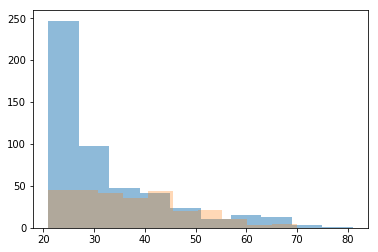

In [371]:
# Explore the Data

column_metadata = {"Pregnancies": ["Number of times pregnant"], 
                   "Glucose": ["Plasma glucose concentration a 2 hours in an oral glucose tolerance test"],
                   "BloodPressure": ["Diastolic blood pressure (mmHg)"],
                   "SkinThickness": ["Triceps skin fold thickness (mm)"],
                   "Insulin": ["2-Hour serum insulin (mu U/ml)"],
                   "BMI": ["Body mass index (weight in kg/(height in m)^2)"],
                   "DiabetesPedigreeFunction": ["Diabetes pedigree function"],
                   "Age": ["Age (years)"],
                   "Outcome": ["Class variable (0 or 1)"]}
column_metadata_df = pd.DataFrame.from_dict(column_metadata).T
### column_metadata_df

# plt.hist(raw_df["Age"], raw_df["Outcome"])
non_diabetic_ages = raw_df[raw_df["Outcome"] == 0]["Age"]
diabetic_ages = raw_df[raw_df["Outcome"] == 1]["Age"]
plt.hist(non_diabetic_ages, alpha=0.5)    # Blue
plt.hist(diabetic_ages, alpha=0.3)        # Orange

In [372]:
# Omit zero-values from: GLUCOSE, BLOODPRESSURE, SKINTHICKNESS, BMI, INSULIN
raw_df = raw_df[raw_df["Glucose"] > 0]
raw_df = raw_df[raw_df["BloodPressure"] > 0]
raw_df = raw_df[raw_df["SkinThickness"] > 0]
raw_df = raw_df[raw_df["BMI"] > 0]
raw_df = raw_df[raw_df["Insulin"] > 0]

<Container object of 392 artists>

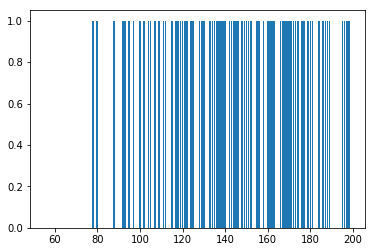

In [398]:
plt.bar(raw_df["Glucose"], raw_df["Outcome"])

In [373]:
# "Clean" the Data

# RANK FOR DATA POTENCY: Glucose --> BMI --> SkinThickness --> Age | Four dimensions to use
dropped_df = raw_df.drop(columns=["Pregnancies", "BloodPressure", "Insulin", "DiabetesPedigreeFunction"])
cleaned_df = dropped_df[["Glucose", "BMI", "SkinThickness", "Age", "Outcome"]]
dataset = raw_df.as_matrix(columns=["Glucose", "BMI", "SkinThickness", "Age"])
class_label_vector = raw_df.as_matrix(columns=["Outcome"])

In [376]:
# Split the Data into Training and Test Sets (or using KFold Cross Validation)
X_train, X_test, Y_train, Y_test = train_test_split(dataset, class_label_vector, shuffle=True)

# Fit the Data
naïve_bayes_classifier = GaussianNB()
naïve_bayes_classifier.fit(X_train, Y_train.ravel())

# Validate the Data Model (Check Predictions on Test Set)
test_predictions = naïve_bayes_classifier.predict(X_test)

# # Gathers and displays classifier resultant information
print("\nTEST PREDICTION VECTOR: \n{}\n".format(test_predictions))
print("\nACTUAL Y-TEST VALUES: \n{}\n".format(Y_test.ravel()))
print("\nACCURACY SCORE: \n{0:.4f}\n".format(accuracy_score(test_predictions, Y_test)))
print("\nF1 SCORE: \n{0:.4f}\n".format(f1_score(Y_test, test_predictions, average="weighted")))
print("\nCLASSIFICATION REPORT: \n{}\n".format(classification_report(Y_test, test_predictions)))
print("\nCONFUSION MATRIX: \n{}\n".format(confusion_matrix(Y_test, test_predictions)))


TEST PREDICTION VECTOR: 
[1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0]


ACTUAL Y-TEST VALUES: 
[1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]


ACCURACY SCORE: 
0.8061


F1 SCORE: 
0.8009


CLASSIFICATION REPORT: 
             precision    recall  f1-score   support

          0       0.81      0.90      0.85        62
          1       0.79      0.64      0.71        36

avg / total       0.80      0.81      0.80        98



CONFUSION MATRIX: 
[[56  6]
 [13 23]]



In [385]:
# Data Analysis with K-Folds Cross Validation
def construct_kf(num_splits):
    return StratifiedKFold(n_splits=num_splits, shuffle=True)

kf = construct_kf(5)
for train_index, test_index in kf.split(dataset, class_label_vector):
    X_train, X_test = dataset[train_index], dataset[test_index]
    Y_train, Y_test = class_label_vector[train_index], class_label_vector[test_index]
    # print("\nTRAINING DATA: \n{}\n".format(train_index))
    # print("\nTEST DATA: \n{}\n".format(test_index))
    
# Fit the Data
naïve_bayes_classifier = GaussianNB()
naïve_bayes_classifier.fit(X_train, Y_train.ravel())

# Validate the Data Model (Check Predictions on Test Set)
test_predictions = naïve_bayes_classifier.predict(X_test)

# # Gathers and displays classifier resultant information
print("\nTEST PREDICTION VECTOR: \n{}\n".format(test_predictions))
print("\nACTUAL Y-TEST VALUES: \n{}\n".format(Y_test.ravel()))
print("\nACCURACY SCORE: \n{0:.4f}\n".format(accuracy_score(test_predictions, Y_test)))
print("\nF1 SCORE: \n{0:.4f}\n".format(f1_score(Y_test, test_predictions, average="weighted")))
print("\nCLASSIFICATION REPORT: \n{}\n".format(classification_report(Y_test, test_predictions)))
print("\nCONFUSION MATRIX: \n{}\n".format(confusion_matrix(Y_test, test_predictions)))


TEST PREDICTION VECTOR: 
[1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0]


ACTUAL Y-TEST VALUES: 
[1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0]


ACCURACY SCORE: 
0.8462


F1 SCORE: 
0.8426


CLASSIFICATION REPORT: 
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        52
          1       0.82      0.69      0.75        26

avg / total       0.84      0.85      0.84        78



CONFUSION MATRIX: 
[[48  4]
 [ 8 18]]

